# Flood Prediction Machine Learning Model 

In [1]:
# This Machine Learning Model uses 5 Machine Learning Algorithms namely KNN Classification, Logistic Regression[LR], Support 
# Vector[SVM], Decision Tree[DT] and Random Forest[RF] to get the best possible model to predict the floods using Kerela Rainfall Data.

## Data Insights

#### Importing Required Libraries.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data = pd.read_csv('kerala.csv')
print(data)

    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT    NOV   

In [3]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [4]:
data.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


# Finding number of missing values

In [5]:
data.isnull().sum()  # cheaking if any colomns is left empty or not.

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

# Analyzing the Dataset

In [6]:
print(data.shape)

(118, 16)


In [7]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [8]:
data.info

<bound method DataFrame.info of     SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9

In [9]:
# replacing the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

C:\Users\Niraj\AppData\Local\Temp\ipykernel_4628\1920187067.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)
C:\Users\Niraj\AppData\Local\Temp\ipykernel_4628\1920187067.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['FLOODS'].repla

In [10]:
#Printing the clean data
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [11]:
# Seperating the data which we are gonna use for prediction.
x=data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [12]:
# Now seperate the flood label from the dataset.
y=data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64

# Plotting the Data


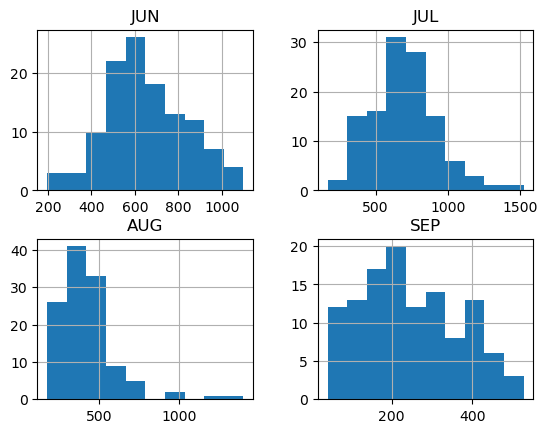

In [13]:
import matplotlib.pyplot as plt   
# sets the backend of matplotlib to the 'inline' backend. 
%matplotlib inline                   
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()
# How the rainfall index vary during rainy season

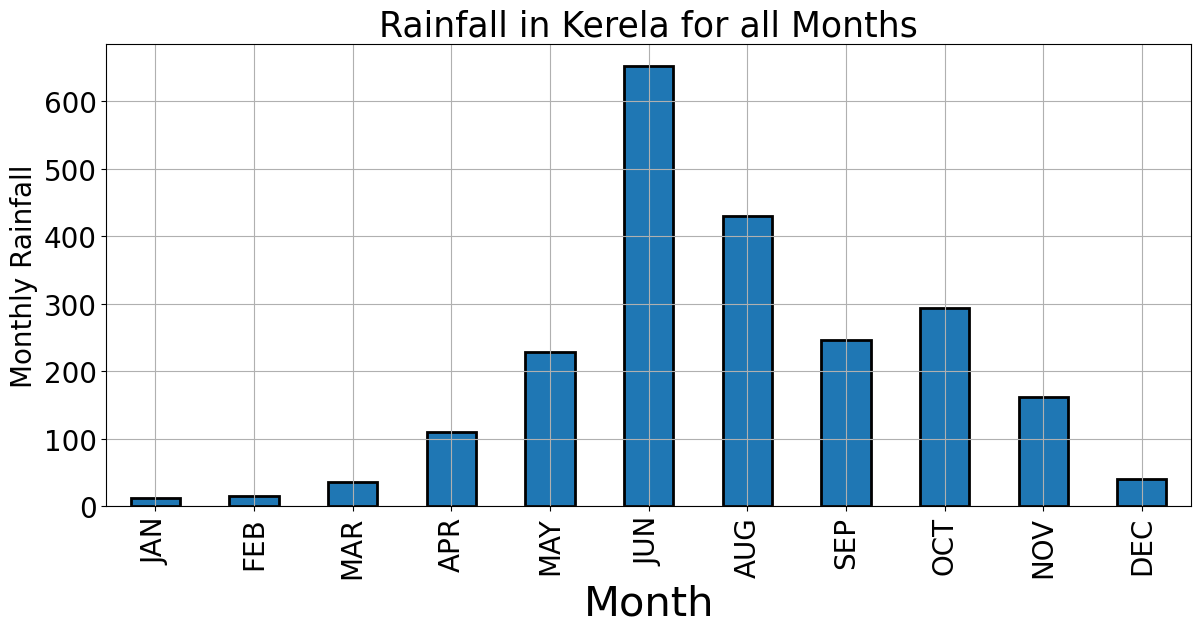

In [14]:
ax = data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(14,6))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall',fontsize=20)
plt.title('Rainfall in Kerela for all Months',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

# Using sklearn to develop the ML Model

In [15]:
# Scaling the data between 0 and 1.
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [16]:
#dividing the dataset into training dataset and test dataset. 
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
43,1944,6.4,26.6,61.6,61.6,212.7,498.9,614.1,230.7,155.0,289.0,244.1,89.2
50,1951,6.6,6.5,41.6,175.9,148.5,774.1,544.6,190.6,313.8,250.6,229.6,23.2
32,1933,1.0,9.3,36.9,139.5,738.8,859.3,773.4,479.5,469.7,397.0,126.1,42.3
86,1987,0.6,0.8,4.3,57.2,108.3,572.6,221.0,396.6,157.0,272.1,216.0,131.1
79,1980,0.0,0.9,20.8,114.8,105.3,745.9,754.0,438.1,139.5,282.3,162.3,39.5


In [17]:
x_train.dtypes

YEAR      int64
JAN     float64
FEB     float64
MAR     float64
APR     float64
MAY     float64
JUN     float64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

In [18]:
x_test.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
67,1968,7.3,30.5,89.2,133.3,90.0,696.4,1308.9,380.7,325.4,178.9,119.4,32.7
8,1909,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3
53,1954,23.5,2.8,90.6,136.9,179.5,798.3,640.5,467.0,201.6,303.1,31.6,62.5
70,1971,31.6,18.5,20.0,113.0,317.5,889.6,648.6,385.2,331.2,220.9,38.3,62.3
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1


In [19]:
# type casting.
y_train=y_train.astype('int')
y_train

43    0
50    0
32    1
86    0
79    0
     ..
44    0
36    0
66    0
85    0
23    1
Name: FLOODS, Length: 94, dtype: int32

In [20]:
y_test=y_test.astype('int')
y_test

67     1
8      1
53     1
70     1
116    0
96     1
39     1
90     1
22     1
77     1
29     1
52     0
51     0
49     1
110    1
98     0
91     1
33     0
89     0
87     0
57     1
45     1
64     0
42     1
Name: FLOODS, dtype: int32

# Using Prediction Algorithms:

## KNN classifier to predict

In [21]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
# Predicted chance of Flood.
print("Predicted Values for the Floods:")
y_predict=clf.predict(x_test)
y_predict

Predicted Values for the Floods:


array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [23]:
print("Actual Values for the Floods:")
print(y_test)

Actual Values for the Floods:
67     1
8      1
53     1
70     1
116    0
96     1
39     1
90     1
22     1
77     1
29     1
52     0
51     0
49     1
110    1
98     0
91     1
33     0
89     0
87     0
57     1
45     1
64     0
42     1
Name: FLOODS, dtype: int32


In [24]:
print("List of the Predicted Values:")
print(y_predict)

List of the Predicted Values:
[1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1]


In [25]:
# Scaling the dataset.
from sklearn.model_selection import cross_val_score,cross_val_predict
x_train_std= minmax.fit_transform(x_train)
x_test_std= minmax.fit_transform(x_test)
knn_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')

In [26]:
knn_acc

array([0.71875   , 0.67741935, 0.83870968])

In [27]:
knn_proba

array([[0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.8, 0.2],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6,

### How accurate is our model?

In [28]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_predict)*100))
print("Recall Score:%f"%(recall_score(y_test,y_predict)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict)*100))
print(confusion_matrix(y_test,y_predict))


Accuracy Score:83.333333
Recall Score:75.000000
ROC score:87.500000
[[ 8  0]
 [ 4 12]]


## Logistic Regression to predict

In [29]:
x_train_std=minmax.fit_transform(x_train)         # fit the values in between 0 and 1.
y_train_std=minmax.transform(x_test)

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')

c:\Users\Niraj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
lr_acc

array([0.78125   , 0.83870968, 0.93548387])

In [31]:
lr_proba

array([[0.72117761, 0.27882239],
       [0.48062462, 0.51937538],
       [0.10764704, 0.89235296],
       [0.8542157 , 0.1457843 ],
       [0.68759658, 0.31240342],
       [0.46996523, 0.53003477],
       [0.62042333, 0.37957667],
       [0.60253032, 0.39746968],
       [0.66740982, 0.33259018],
       [0.53868094, 0.46131906],
       [0.30297663, 0.69702337],
       [0.29111708, 0.70888292],
       [0.6028833 , 0.3971167 ],
       [0.44240707, 0.55759293],
       [0.29199191, 0.70800809],
       [0.615276  , 0.384724  ],
       [0.12666851, 0.87333149],
       [0.83556299, 0.16443701],
       [0.67628626, 0.32371374],
       [0.68256504, 0.31743496],
       [0.58494557, 0.41505443],
       [0.79505143, 0.20494857],
       [0.57372799, 0.42627201],
       [0.40919243, 0.59080757],
       [0.57940644, 0.42059356],
       [0.54348395, 0.45651605],
       [0.5312542 , 0.4687458 ],
       [0.63043488, 0.36956512],
       [0.49624386, 0.50375614],
       [0.41255776, 0.58744224],
       [0.

In [32]:
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [33]:
print(y_test.values)

[1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1]


In [34]:
print("List of the Predicted Values:")
print(y_pred)

List of the Predicted Values:
[1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1]


### Accuracy and Efficiency of our Model 

In [35]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:91.666667
recall score:87.500000
roc score:93.750000
[[ 8  0]
 [ 2 14]]


## Support Vector Classification to predict

In [36]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')

In [37]:
svc_acc

array([0.75      , 0.80645161, 0.96774194])

In [38]:
svc_proba

array([[0.93631364, 0.06368636],
       [0.40525402, 0.59474598],
       [0.01795448, 0.98204552],
       [0.9278709 , 0.0721291 ],
       [0.89922413, 0.10077587],
       [0.47667162, 0.52332838],
       [0.71955461, 0.28044539],
       [0.71955499, 0.28044501],
       [0.93209116, 0.06790884],
       [0.60751953, 0.39248047],
       [0.09882609, 0.90117391],
       [0.05598036, 0.94401964],
       [0.52235437, 0.47764563],
       [0.54351789, 0.45648211],
       [0.12452414, 0.87547586],
       [0.7752312 , 0.2247688 ],
       [0.00748279, 0.99251721],
       [0.99161988, 0.00838012],
       [0.93147773, 0.06852227],
       [0.8762025 , 0.1237975 ],
       [0.81021137, 0.18978863],
       [0.90309388, 0.09690612],
       [0.57497283, 0.42502717],
       [0.23759781, 0.76240219],
       [0.6008732 , 0.3991268 ],
       [0.65879715, 0.34120285],
       [0.47883548, 0.52116452],
       [0.86748229, 0.13251771],
       [0.19602462, 0.80397538],
       [0.33325528, 0.66674472],
       [0.

In [39]:
svc_scores=svc_proba[:,1]
svc_scores

array([0.06368636, 0.59474598, 0.98204552, 0.0721291 , 0.10077587,
       0.52332838, 0.28044539, 0.28044501, 0.06790884, 0.39248047,
       0.90117391, 0.94401964, 0.47764563, 0.45648211, 0.87547586,
       0.2247688 , 0.99251721, 0.00838012, 0.06852227, 0.1237975 ,
       0.18978863, 0.09690612, 0.42502717, 0.76240219, 0.3991268 ,
       0.34120285, 0.52116452, 0.13251771, 0.80397538, 0.66674472,
       0.55794292, 0.05972908, 0.71064678, 0.08272667, 0.27332698,
       0.90789255, 0.15762836, 0.45531523, 0.32949861, 0.91112865,
       0.52959378, 0.65561557, 0.90905638, 0.96724986, 0.03817861,
       0.90555951, 0.47108384, 0.96266209, 0.98320625, 0.76582929,
       0.92285988, 0.42989498, 0.89873403, 0.64902092, 0.16124694,
       0.6658286 , 0.83571139, 0.27239828, 0.01818062, 0.85409741,
       0.13216207, 0.31649512, 0.85317299, 0.77116559, 0.76109962,
       0.20041975, 0.73845035, 0.02180004, 0.02299525, 0.61026104,
       0.14593976, 0.06520045, 0.7489013 , 0.2314162 , 0.69395

In [40]:
y_pred=svc_classifier.predict(x_test)
print("Actual Flood Values:")
print(y_test.values)

Actual Flood Values:
[1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1]


In [41]:
print("Predicted Flood Values:")
print(y_pred)

Predicted Flood Values:
[1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1]


### Accuracy of our model

In [42]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:87.500000
recall score:81.250000
roc score:90.625000
[[ 8  0]
 [ 3 13]]


# Decision Tree Classification to Predict

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.53125   , 0.64516129, 0.58064516])

In [44]:
print("Predicted Values:")
y_pred=dtc_clf.predict(x_test)
y_pred

Predicted Values:


array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [45]:
print("Actual Values:")
print(y_test.values)

Actual Values:
[1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1]


### Printing the Accuracy

In [46]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:83.333333
recall score:75.000000
roc score:87.500000
[[ 8  0]
 [ 4 12]]


# Random Forest Classifier to predict

In [47]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [48]:
rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [49]:
rmf_clf_acc

array([0.71875   , 0.74193548, 0.80645161])

In [50]:
rmf_proba

array([[0.67907412, 0.32092588],
       [0.38655354, 0.61344646],
       [0.1891507 , 0.8108493 ],
       [0.8860547 , 0.1139453 ],
       [0.6782178 , 0.3217822 ],
       [0.4874301 , 0.5125699 ],
       [0.48488689, 0.51511311],
       [0.65581596, 0.34418404],
       [0.54187137, 0.45812863],
       [0.44371104, 0.55628896],
       [0.34818176, 0.65181824],
       [0.41004363, 0.58995637],
       [0.75955244, 0.24044756],
       [0.34532281, 0.65467719],
       [0.29920709, 0.70079291],
       [0.51602909, 0.48397091],
       [0.17981946, 0.82018054],
       [0.82938471, 0.17061529],
       [0.61192528, 0.38807472],
       [0.66632591, 0.33367409],
       [0.54641316, 0.45358684],
       [0.75929358, 0.24070642],
       [0.45762675, 0.54237325],
       [0.47222013, 0.52777987],
       [0.48992666, 0.51007334],
       [0.59899134, 0.40100866],
       [0.63436169, 0.36563831],
       [0.67642952, 0.32357048],
       [0.49943898, 0.50056102],
       [0.53166372, 0.46833628],
       [0.

In [51]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:83.333333
recall score:75.000000
roc score:87.500000
[[ 8  0]
 [ 4 12]]


# Final Accuracy of our Models 

### Comparing all the prediction models

In [52]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
tr_split

c:\Users\Niraj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Name,Score
0,KNN,0.833333
1,LR,0.916667
2,SVC,0.875000
3,DT,0.916667
4,RF,1.000000


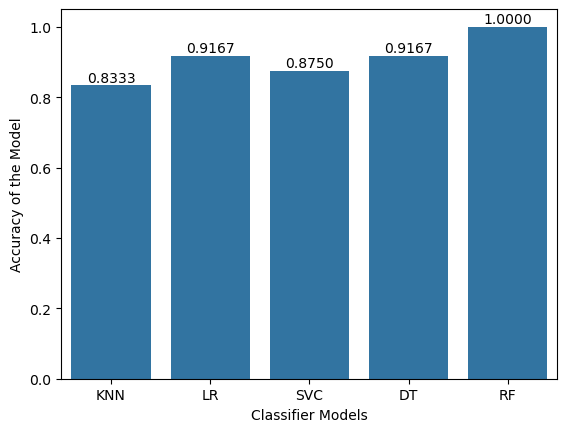

In [53]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [54]:
tr_split['Score'].max() 

1.0

In [55]:
file_path = 'kerala.csv'  # Update this to the correct path if needed
data = pd.read_csv(file_path)

### So we can see and choose the best model for Prediction.

### Here we add recall,precision,f1.scan

In [56]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Load the dataset
file_path = 'kerala.csv'  # Update this to the correct path if needed
data = pd.read_csv(file_path)


In [58]:
# Display the first few rows of the dataset
data.head()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [59]:
# Strip any whitespace characters from column names to ensure correct referencing
data.columns = data.columns.str.strip()

In [60]:
# Prepare the features (X) and target (y)
X = data.drop(columns=["SUBDIVISION", "YEAR", "FLOODS", "ANNUAL RAINFALL"])
y = data["FLOODS"].apply(lambda x: 1 if x == "YES" else 0)



In [61]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [62]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [63]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}


In [64]:
# Initialize a list to store results
results = []

In [65]:
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    
    # Append metrics to results
    results.append({
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Accuracy": accuracy,
        "AUC": auc
    })

In [66]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Summary:")
print(results_df)




Model Performance Summary:
           Model  Precision    Recall  F1 Score  Accuracy       AUC
0  Random Forest   0.941176  0.842105  0.888889  0.888889  0.958204
1  Decision Tree   0.866667  0.684211  0.764706  0.777778  0.783282
2            SVM   0.944444  0.894737  0.918919  0.916667  0.981424


In [67]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [68]:
# Calculate Precision, Recall, F1 score, and Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [69]:
# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: 0.9444444444444444
Recall: 0.8947368421052632
F1 Score: 0.918918918918919
Accuracy: 0.9166666666666666


### Here we add Confusion Matrix Graph

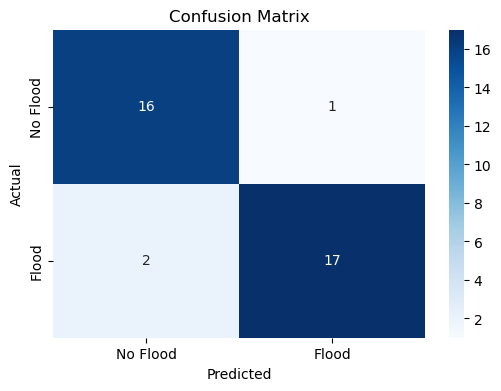

In [70]:
# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Flood", "Flood"], yticklabels=["No Flood", "Flood"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Here we add Roc curve

In [71]:
# Calculate and display the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

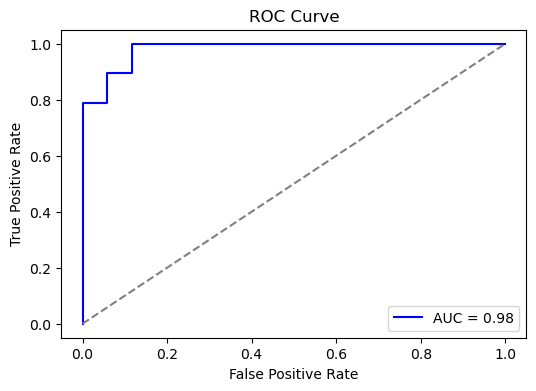

In [72]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Model Performance Summary:
           Model  Precision    Recall  F1 Score  Accuracy       AUC
0  Random Forest   0.941176  0.842105  0.888889  0.888889  0.958204
1  Decision Tree   0.866667  0.684211  0.764706  0.777778  0.783282
2            SVM   0.944444  0.894737  0.918919  0.916667  0.981424


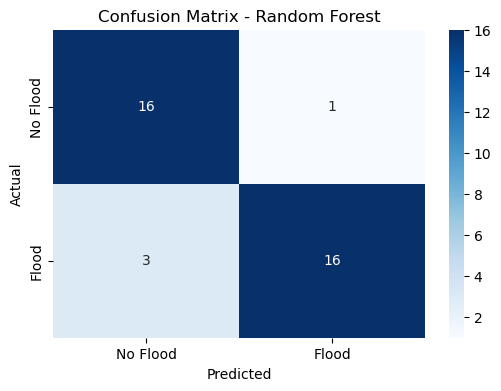

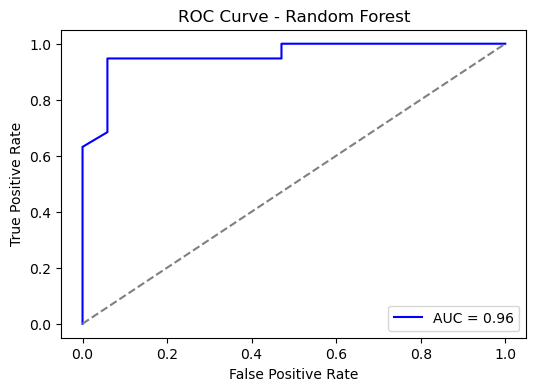

In [73]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'kerala.csv'  # Update this to the correct path if needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

# Strip any whitespace characters from column names to ensure correct referencing
data.columns = data.columns.str.strip()

# Prepare the features (X) and target (y)
X = data.drop(columns=["SUBDIVISION", "YEAR", "FLOODS", "ANNUAL RAINFALL"])
y = data["FLOODS"].apply(lambda x: 1 if x == "YES" else 0)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Initialize a list to store results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    
    # Append metrics to results
    results.append({
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Accuracy": accuracy,
        "AUC": auc
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Summary:")
print(results_df)

# Display Confusion Matrix and ROC Curve for Random Forest
best_model = models["Random Forest"]  # You can change this to evaluate a different model

# Generate and display the confusion matrix
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Flood", "Flood"], yticklabels=["No Flood", "Flood"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Calculate and display the ROC curve
if hasattr(best_model, "predict_proba"):
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Random Forest")
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve not available for the selected model (SVM without probability estimates).")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'kerala.csv'
data = pd.read_csv(file_path)

# Encode target variable ('FLOODS') and prepare feature set
label_encoder = LabelEncoder()
data['FLOODS'] = label_encoder.fit_transform(data['FLOODS'])

# Separate features and target variable
X = data.drop(columns=['SUBDIVISION', 'YEAR', 'FLOODS'])
y = data['FLOODS']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Classifier': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train models and plot precision-recall curves
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Get prediction probabilities
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Compute precision-recall values
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    
    # Plot precision-recall curve
    plt.plot(recall, precision, label=model_name)

# Customize and show plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall vs Precision for Different Models')
plt.legend()
plt.grid()
plt.show()

NameError: name 'data' is not defined